# Exercise 7
## Machine Learning, Linear/logistic regression

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Data

*kursiver Text*![image.png](attachment:image.png)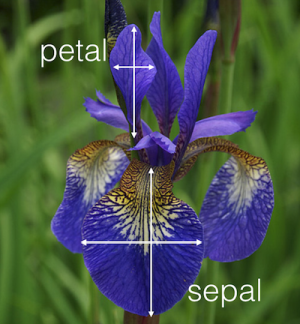

(Source: https://kedro.readthedocs.io/en/0.17.5/02_get_started/05_example_project.html)

In [ ]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
target_names = iris['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Regression

In [ ]:
# prepare data
iris_df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
iris_df["target"]= iris["target"]
iris_df["target_names"]=iris_df["target"].map(lambda x: target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


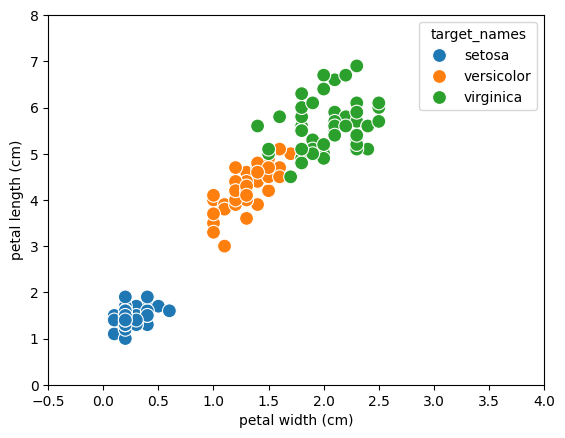

In [ ]:
sns.scatterplot(data=iris_df,x="petal width (cm)",y="petal length (cm)",hue = "target_names",s=100)
plt.ylim([0, 8])
plt.xlim([-0.5, 4])
plt.show()

### Fitting a function

In [ ]:
def linearFunction(x, m, b):
    return m*x+b

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0, step=1.0), FloatSlider(value=…

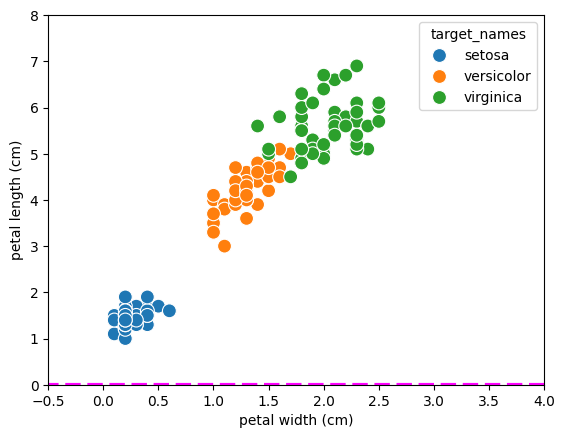

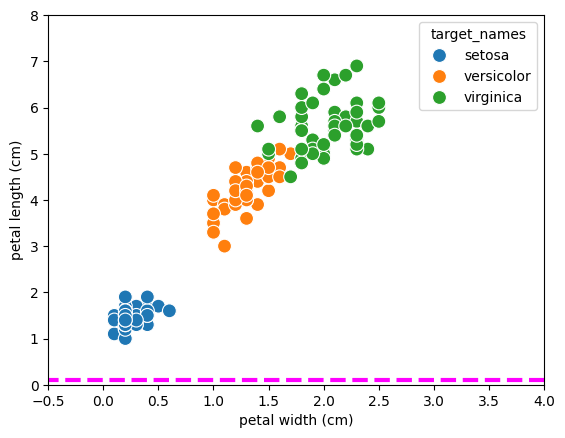

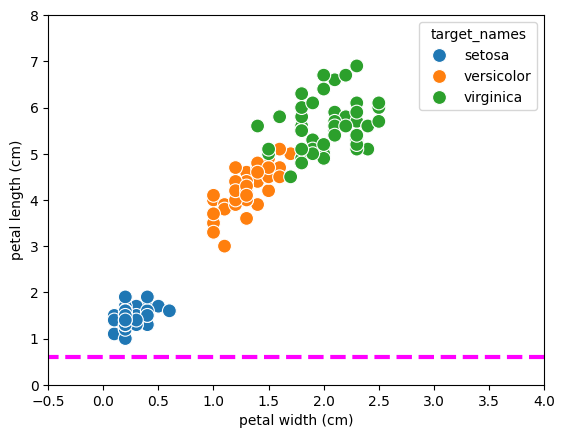

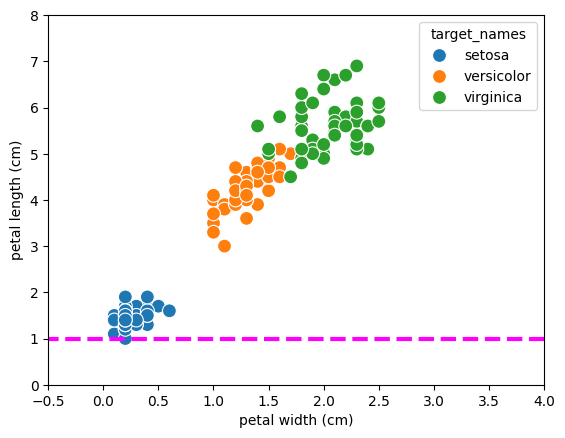

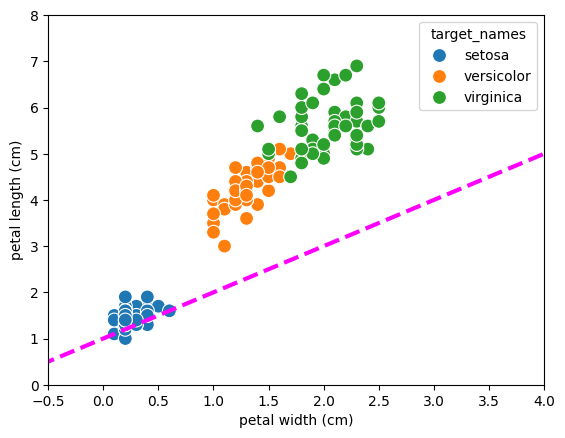

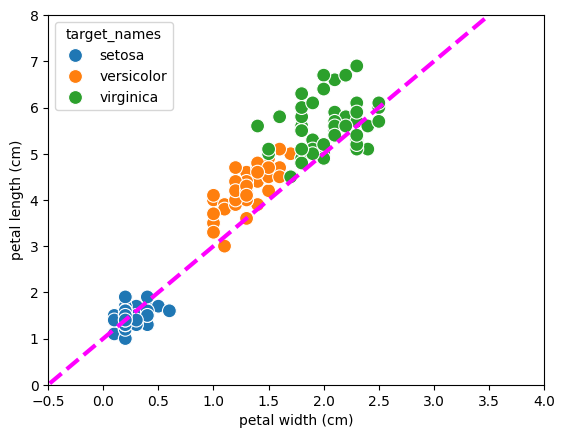

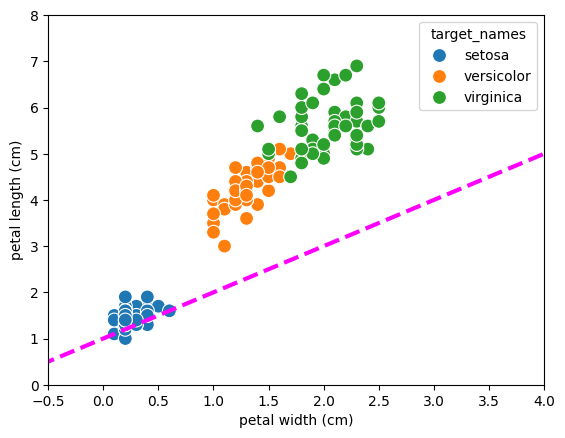

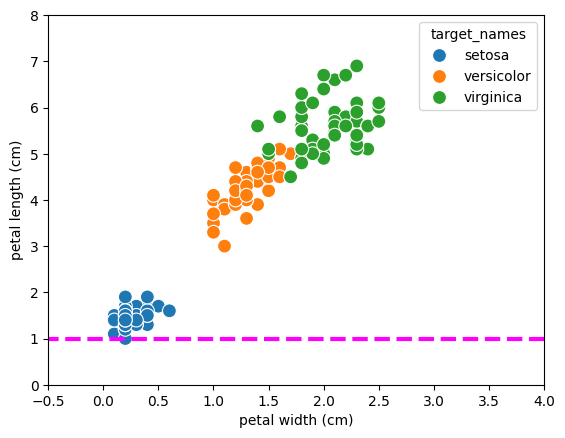

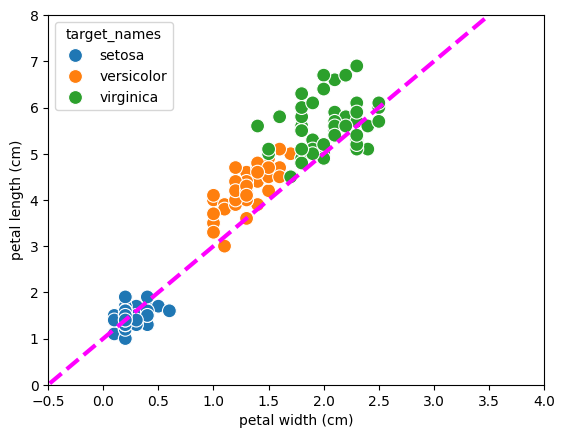

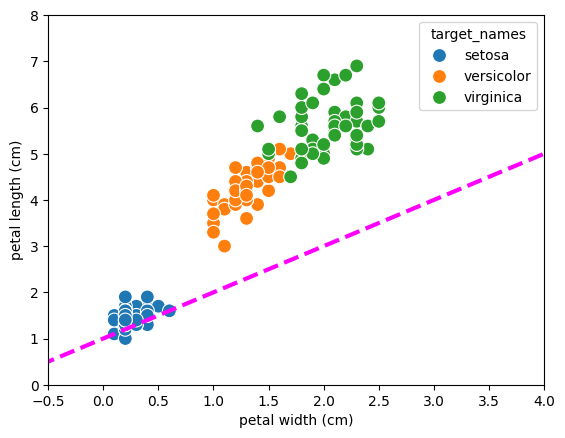

In [ ]:
x = np.arange(-1, 5.0, 0.1)

@interact(m=(-5.0, 5.0, 1.0), b=(0, 2.0, 0.1))
def plot_linear_line(m=0, b=0):

    line = linearFunction(x,m,b) # Creating a line using your function and the values given

    plt.plot(x, line, '--', color='magenta', linewidth=3)
    sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
    plt.ylim([0, 8])
    plt.xlim([-0.5, 4])

In [ ]:
def quadratic_function(x, a, b, c):
    return a *(x*x) + b*x +c

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0, min=-6.0), FloatSlider(value=0.0, descr…

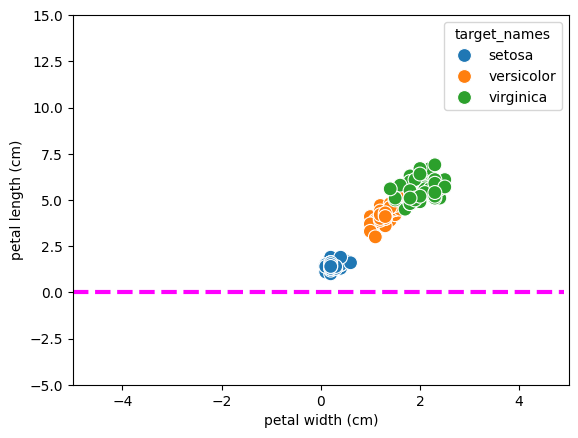

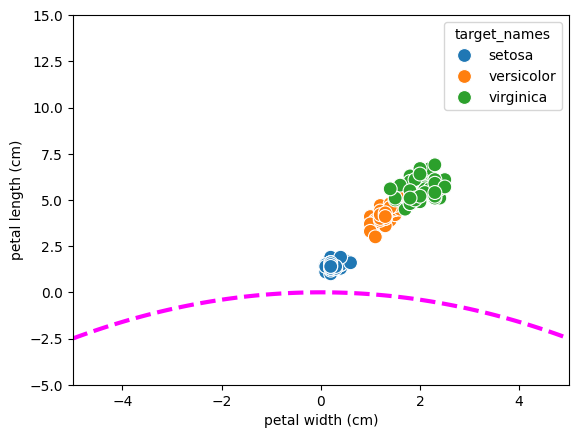

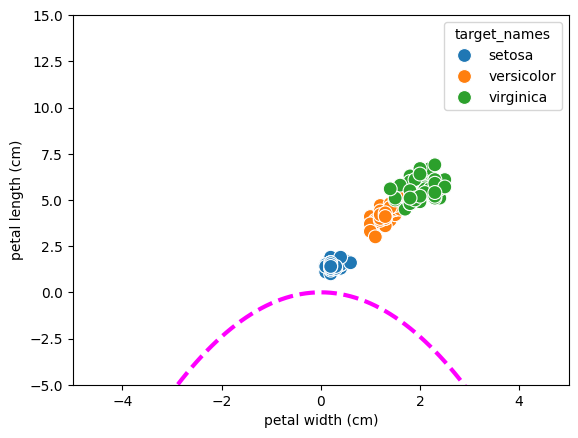

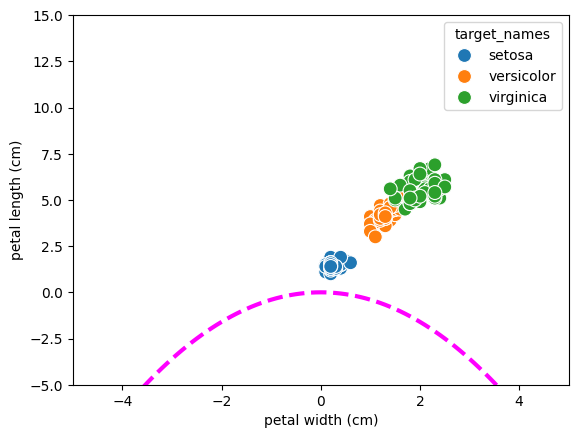

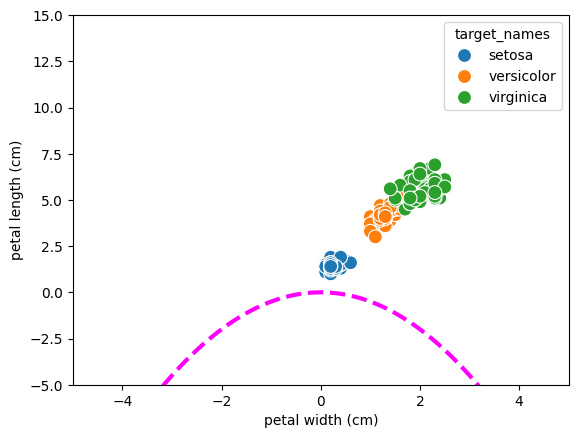

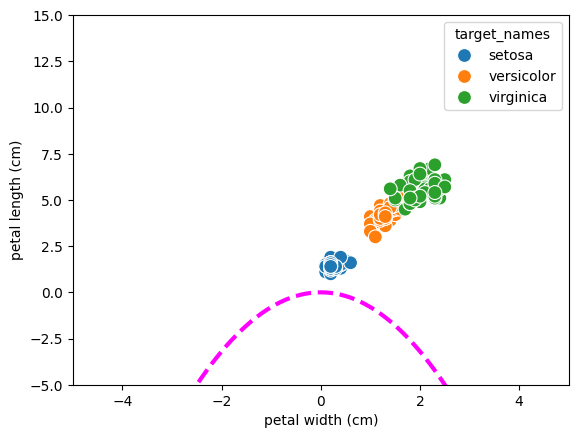

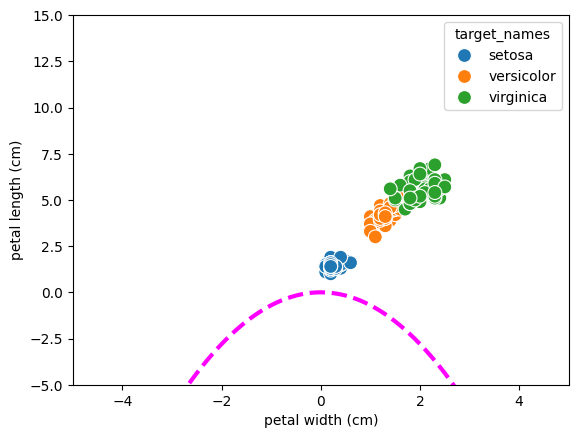

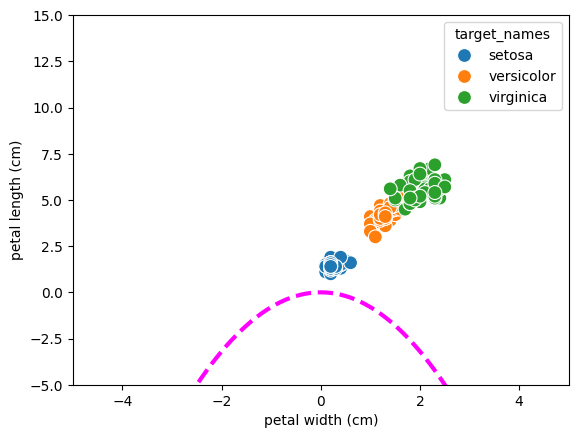

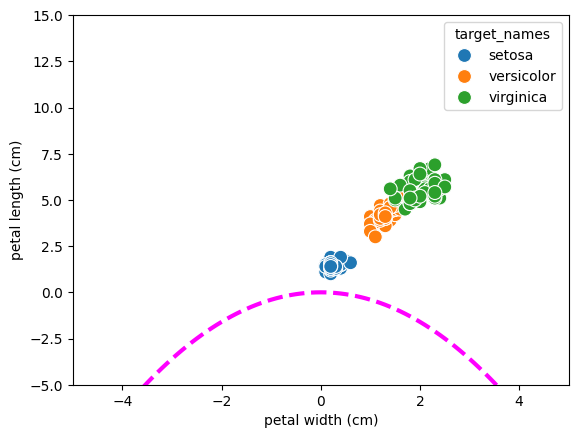

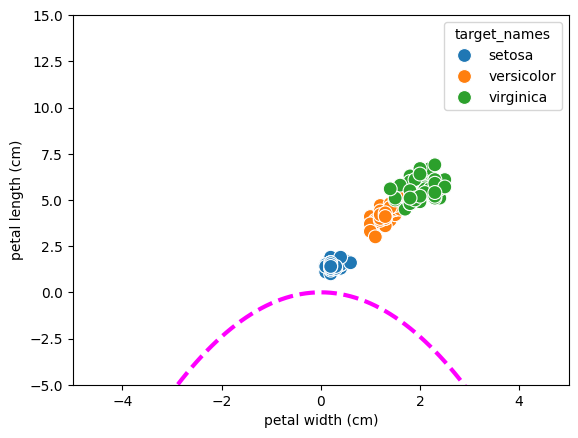

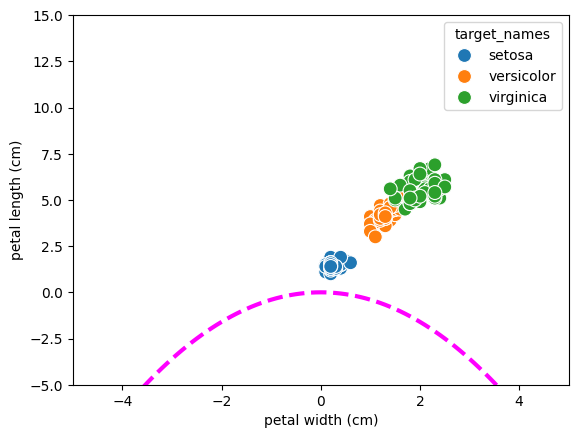

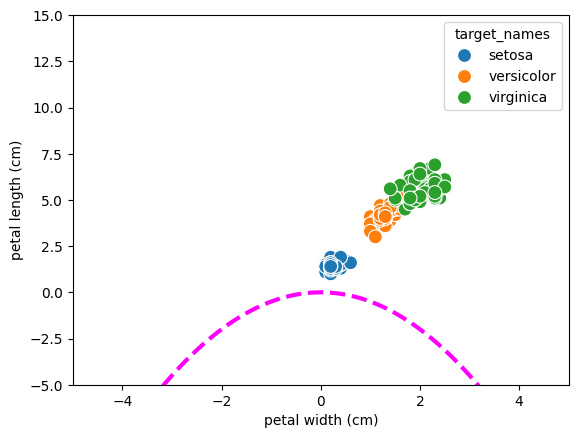

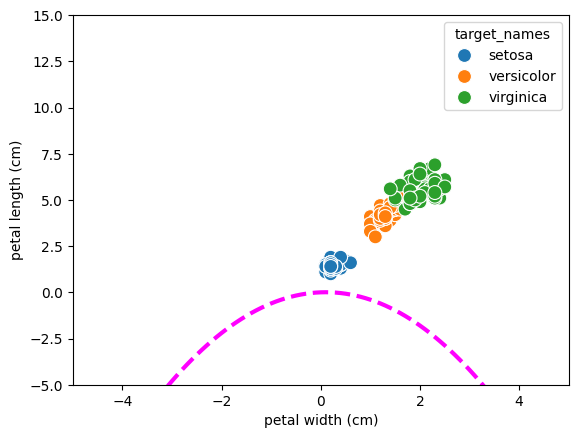

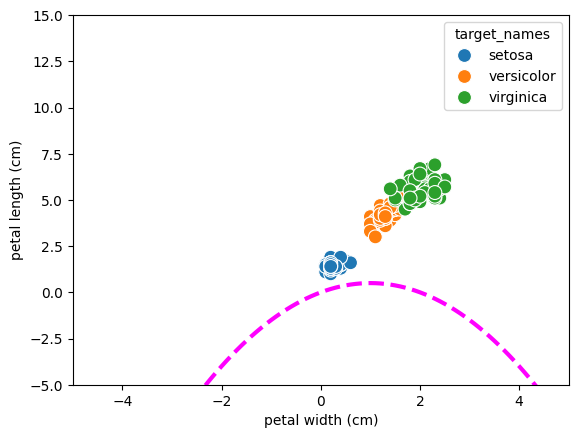

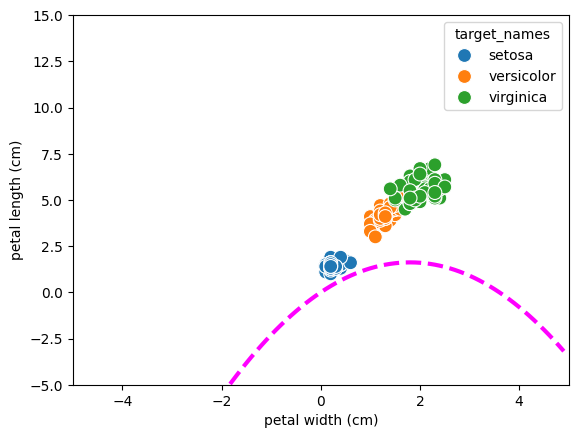

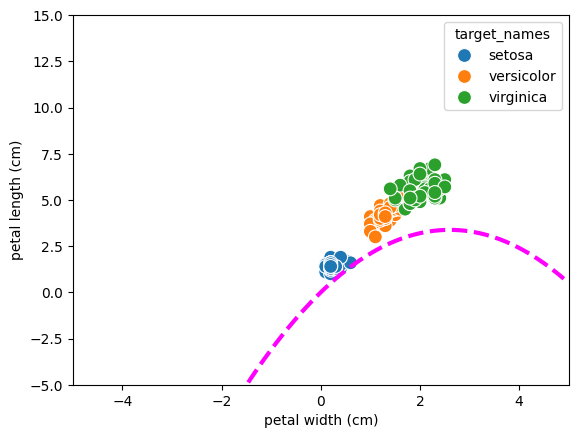

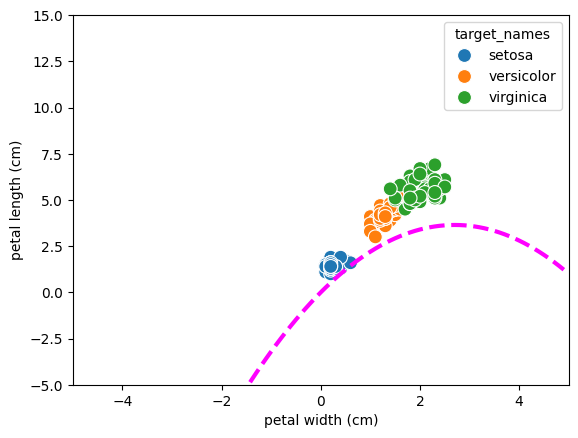

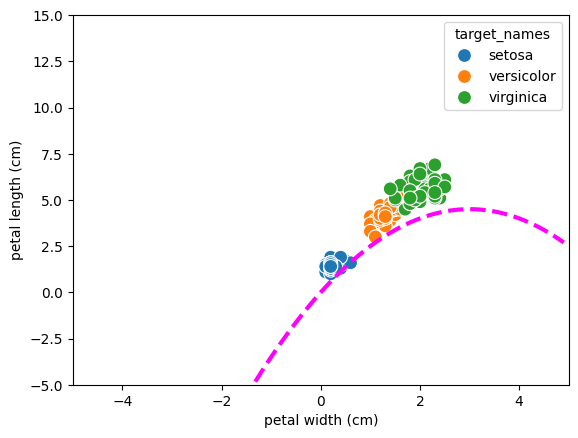

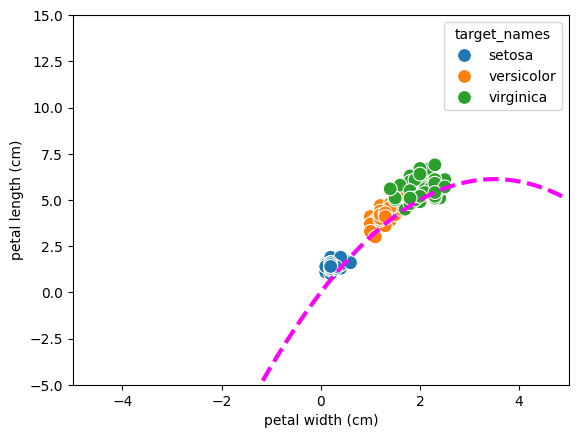

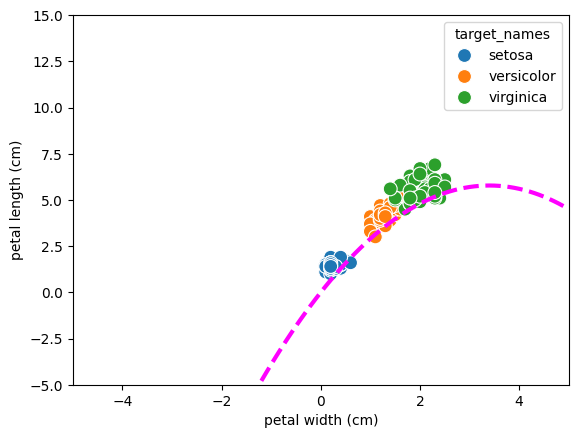

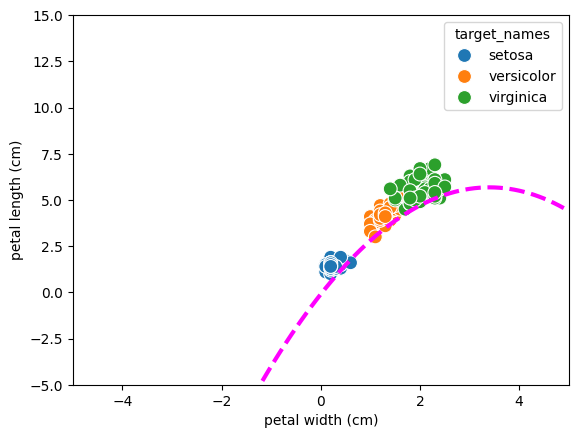

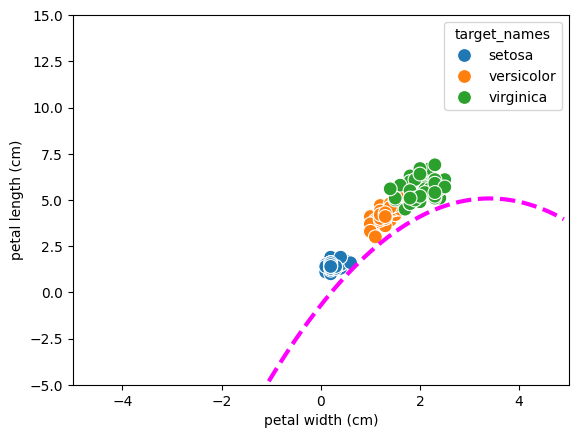

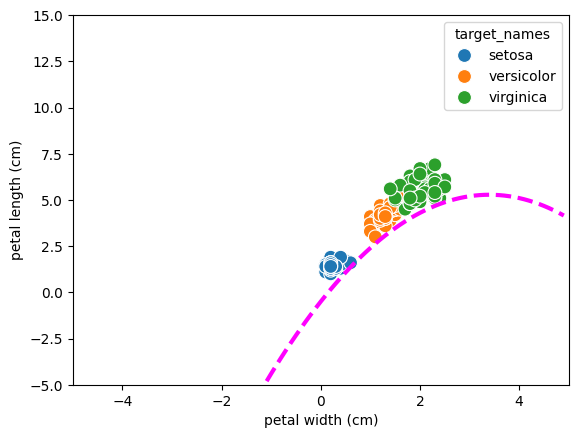

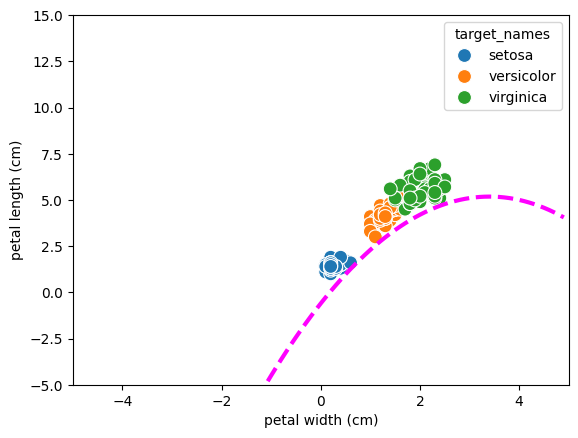

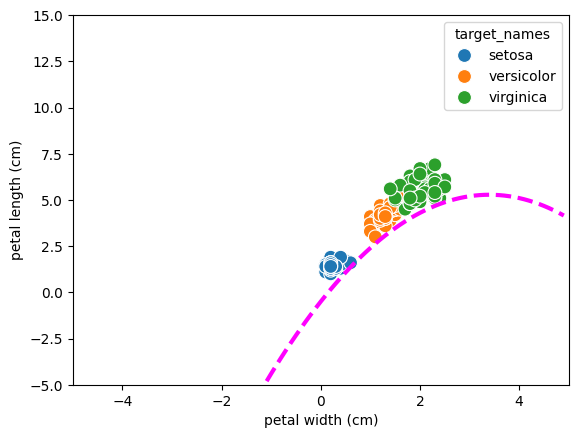

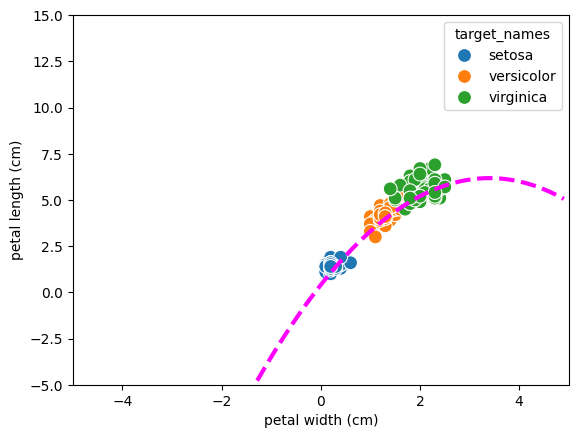

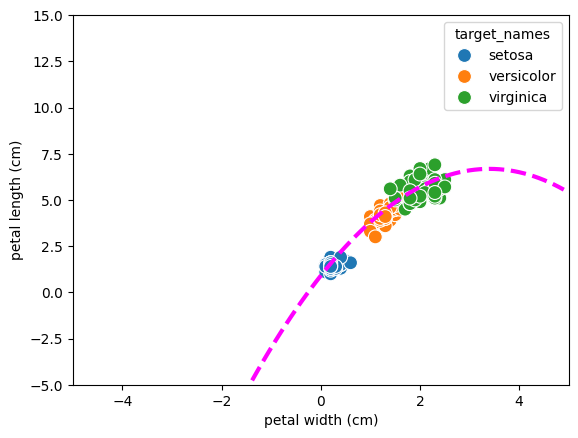

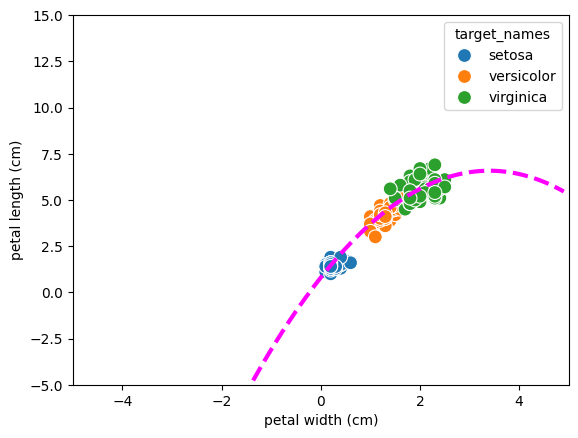

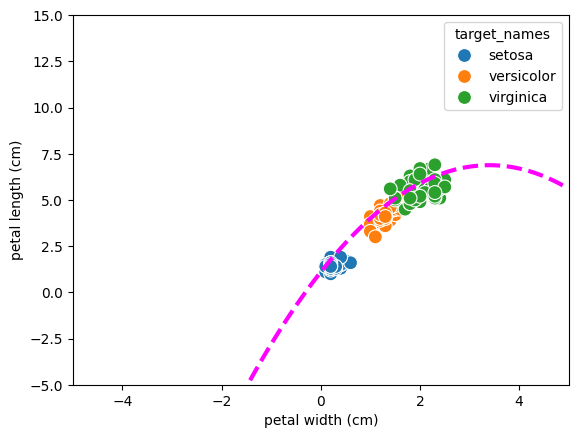

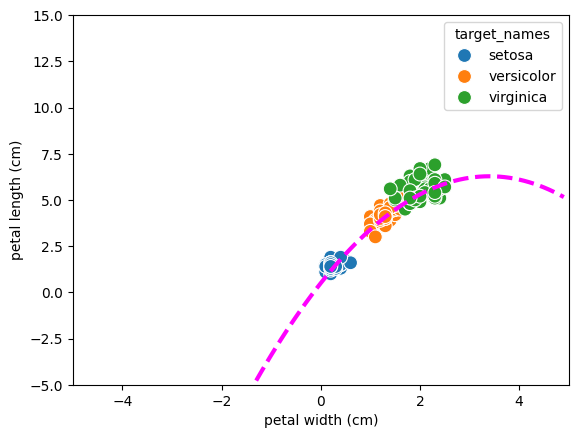

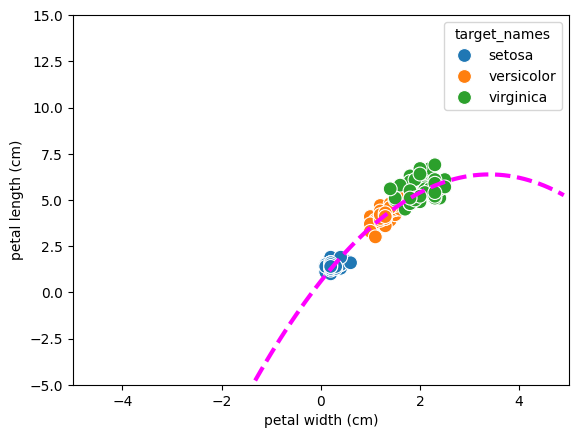

In [ ]:
x = np.arange(-5, 5.0, 0.1)

@interact(a=(-6, 6.0, 0.1), b=(-3.0, 4.0, 0.1), c=(-1.0, 6.0, 0.1))
def plot_parabola(a=0, b=0, c=0):

    parabola = quadratic_function(x,a,b,c) # Creating a line using your function and the values given

    plt.plot(x, parabola, '--', color='magenta', linewidth=3)
    sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
    plt.ylim([-5, 15])
    plt.xlim([-5, 5])
    #[-5.277e-01  3.455e+00  6.781e-01]

In [ ]:
def exponential_function(x, a, b):
    return a* (b**x)

interactive(children=(FloatSlider(value=0.0, description='a', max=6.0), FloatSlider(value=1.0, description='b'…

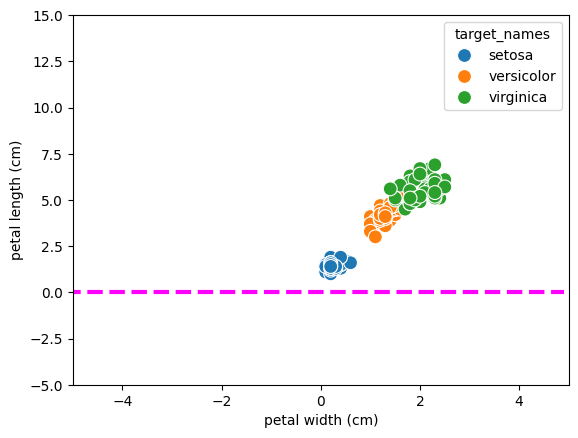

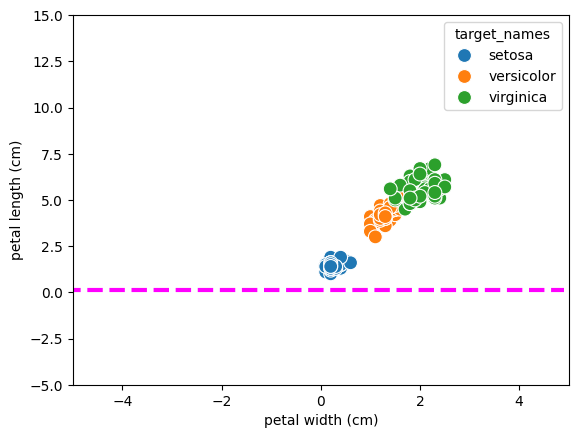

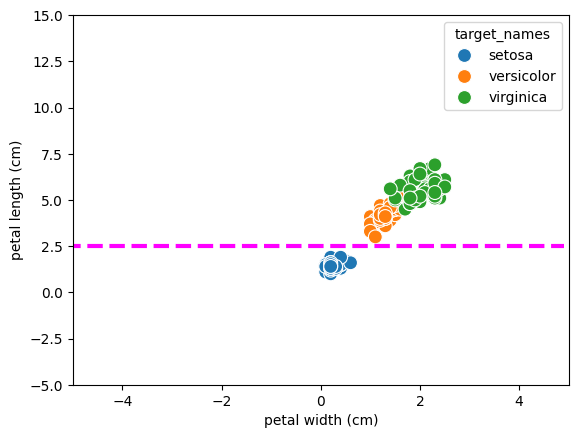

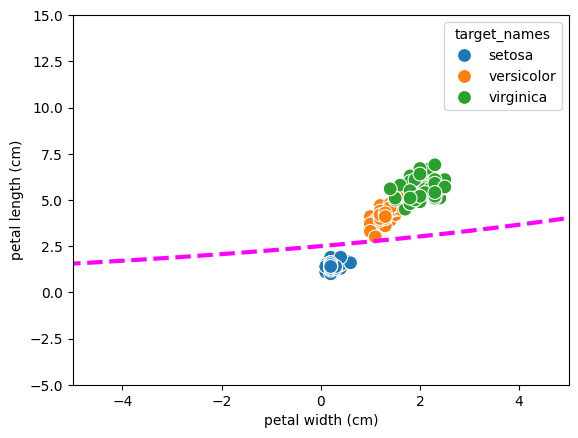

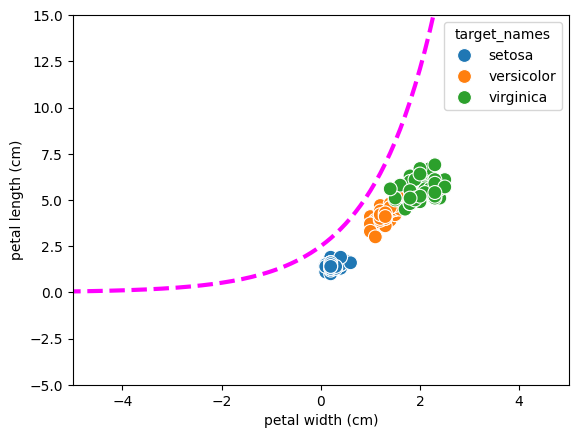

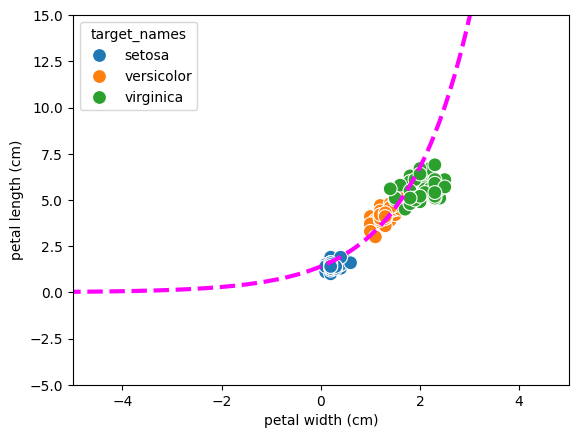

In [ ]:
x = np.arange(-10, 5.0, 0.1)

@interact(a=(0, 6.0, 0.1), b=(1.0, 4.0, 0.1))
def plot_exp_func(a=0, b=1):

    exp_func = exponential_function(x,a,b)  # Creating a line using your function and the values given

    plt.plot(x, exp_func, '--', color='magenta', linewidth=3)
    sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
    plt.ylim([-5, 15])
    plt.xlim([-5, 5])

### Minimze

In [ ]:
from scipy.optimize import minimize

What should/can we minimize?

In [ ]:
def helper(values, x, y):
    # minimize the mean-squared error (MSE)
    return ((y-quadratic_function(x,*values))**2).sum()

In [ ]:
# prepare features
X = np.asarray(iris_df['petal width (cm)'])
y = iris_df['petal length (cm)']

In [ ]:
m = minimize(helper,[1, 1, 1],args=(X,y))  #[1, 1, 1, 1] represents the initial guess!
m

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 24.752382126831613
        x: [-5.277e-01  3.455e+00  6.781e-01]
      nit: 4
      jac: [-7.153e-07 -9.537e-07 -4.768e-07]
 hess_inv: [[ 1.531e-02 -3.554e-02  1.177e-02]
            [-3.554e-02  8.828e-02 -3.424e-02]
            [ 1.177e-02 -3.424e-02  2.068e-02]]
     nfev: 28
     njev: 7

(-5.0, 5.0)

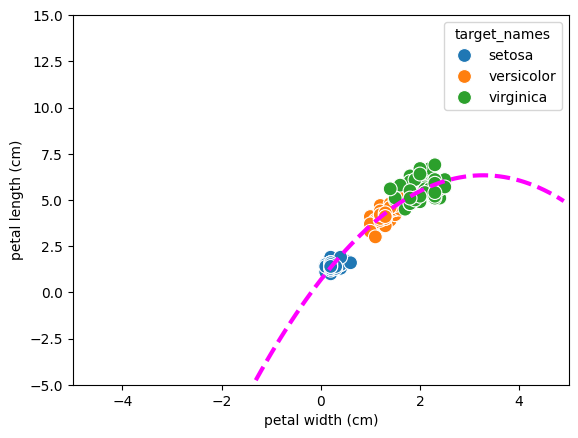

In [ ]:
x = np.arange(-5, 5.0, 0.1)
y_fit = quadratic_function(x,*m.x)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([-5, 15])
plt.xlim([-5, 5])

### Curve fitting

[1.81276257 1.72875498]


(-5.0, 5.0)

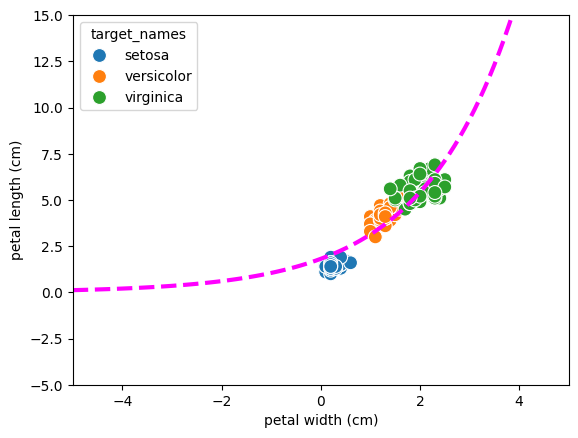

In [ ]:
from scipy.optimize import curve_fit

values = curve_fit(exponential_function, X, y)[0]
print(values)

x = np.arange(-5, 5.0, 0.1)
y_fit = exponential_function(x, *values)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([-5, 15])
plt.xlim([-5, 5])

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# perform Linear Regression
reg = LinearRegression()
reg.fit(X.reshape((-1,1)),y)

LinearRegression()

In [ ]:
print('Intercept b:', reg.intercept_)
print('\nSlope m:', reg.coef_)

Intercept b: 1.0835580328505112

Slope m: [2.2299405]


(-0.5, 4.0)

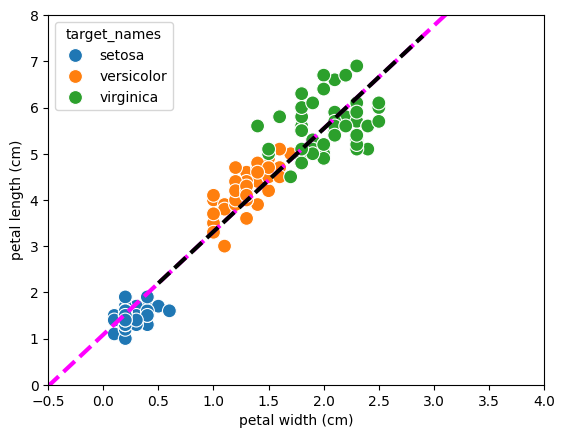

In [ ]:
# Plot predicted line
x = np.arange(-1, 5.0, 0.1)
line = linearFunction(x,reg.coef_,reg.intercept_)
plt.plot(x, line, '--', color='magenta', linewidth=3)

# or just predict some y values
x = np.arange(0.5, 3.0, 0.1)
line_pred = reg.predict(x.reshape((-1, 1)))
plt.plot(x, line_pred, '--', color='black', linewidth=3)
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([-0.5, 4])

(-0.5, 4.0)

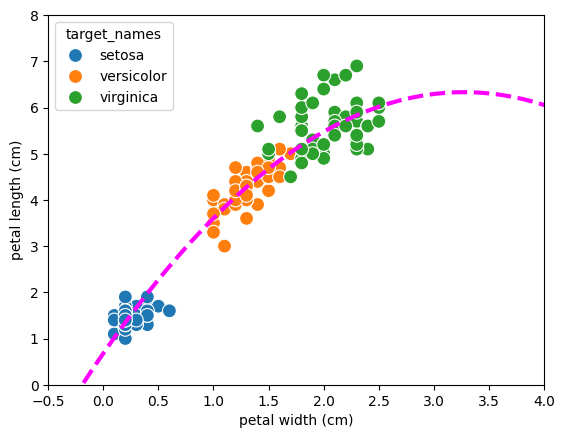

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape((-1,1)))

# plot
reg = LinearRegression()

# perform Linear Regression
reg.fit(X_poly, y)

# Plot predicted line
x = np.arange(-1, 5.0, 0.1)
line = reg.predict(poly.fit_transform(x.reshape((-1, 1))))

plt.plot(x, line, '--', color='magenta', linewidth=3)
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([-0.5, 4])


In [ ]:
reg.coef_

array([ 0.        ,  3.45483353, -0.52769182])

(-0.5, 4.0)

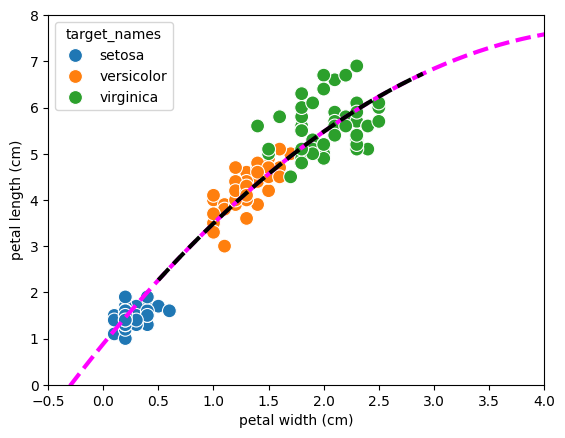

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# create a pipeline
model = make_pipeline(PolynomialFeatures(2), Ridge())

# fit the model
model.fit(X.reshape((-1, 1)), y)

# Plot predicted line
x = np.arange(-1, 5.0, 0.1)
line = model.predict(x.reshape((-1, 1)))
plt.plot(x, line, '--', color='magenta', linewidth=3)

# or just predict some y values
x = np.arange(0.5, 3.0, 0.1)
line_pred = model.predict(x.reshape((-1, 1)))
plt.plot(x, line_pred, '--', color='black', linewidth=3)
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([-0.5, 4])


## Classification

Load different data features

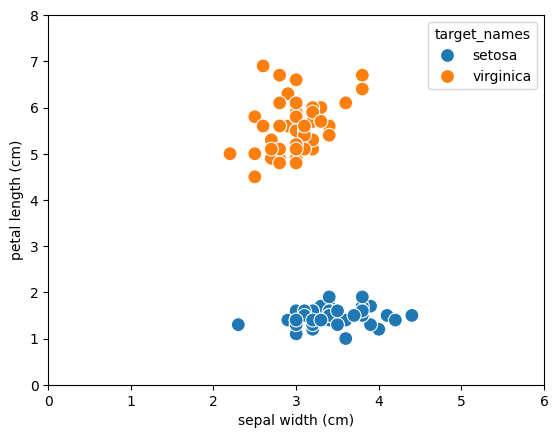

In [ ]:
iris = datasets.load_iris()

# create new dataframe with setosa and virginica classes only
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df['target_names'] = iris_df['target'].map(lambda x: target_names[x])
iris_df = iris_df[iris_df['target_names'].isin(['setosa', 'virginica'])]
iris_df['target'] = iris_df['target'].map(lambda x: 1 if x == 2 else -1)

sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])
plt.show()

In [ ]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

In [ ]:
# preparte features for classification
X, y = np.c_[iris_df['sepal width (cm)'], iris_df['petal length (cm)']], iris_df.target
X.shape

(100, 2)

### kNN (k-Nearest-Neighbors)

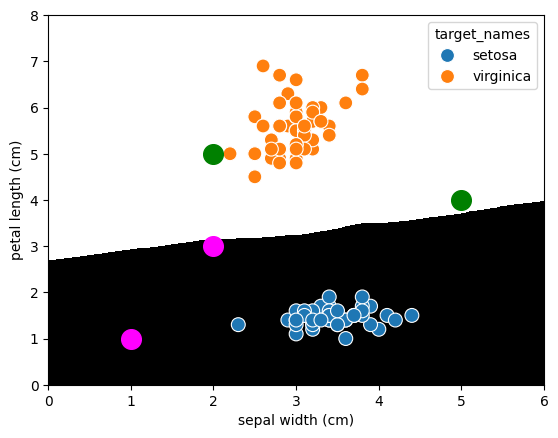

In [ ]:
n_neighbors = 3
weights = ['uniform', 'distance']
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights[1])
kNN.fit(X, y)

xx, yy = np.meshgrid(np.arange(0, 8, 0.02),
                     np.arange(0, 6, 0.02))
Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='gray')

# Plot also the training points
sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])

# test some points
test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
preds = kNN.predict(test_points)

for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

plt.show()

### SVM
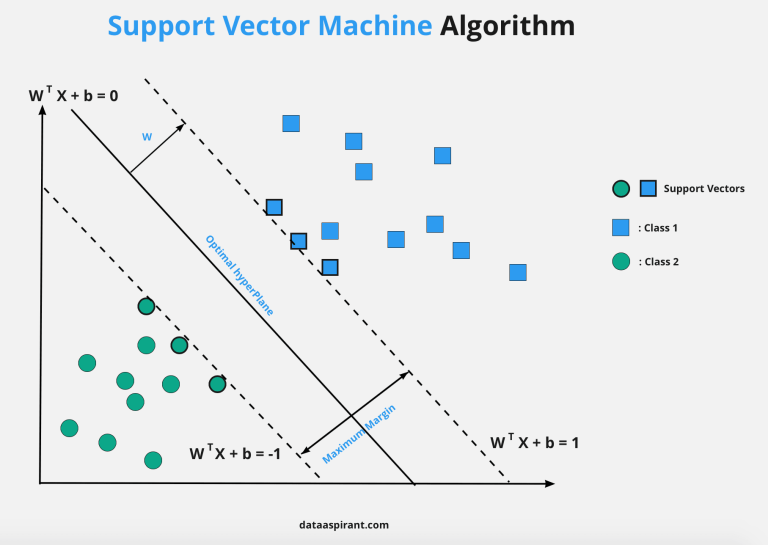
![image.png](attachment:image.png)
(https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/12/3-Support-Vector-Machine-Algorithm.png?resize=768%2C545&ssl=1)

In [ ]:
# !pip install mlxtend

In [ ]:
from sklearn.svm import SVC

plot_decision_regions this function is doing everything. Play around with degrees and so on

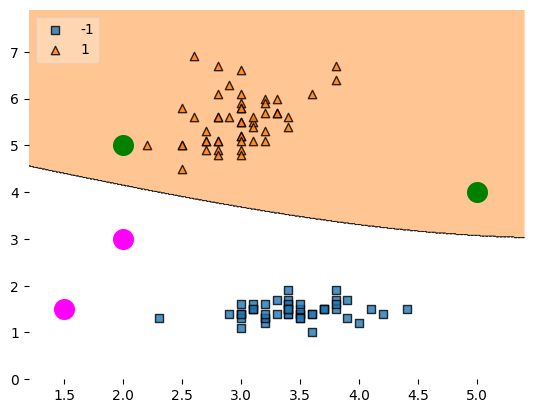

In [ ]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions


svm = SVC(kernel="poly",degree=6)
svm.fit(X,y)

plot_decision_regions(X,np.asarray(y),clf=svm,legend=2)


# test some points
test_points = [[1.5, 1.5], [2, 5], [2, 3], [5, 4]]
preds = svm.predict(test_points)


for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

### K-Means (unsupervised)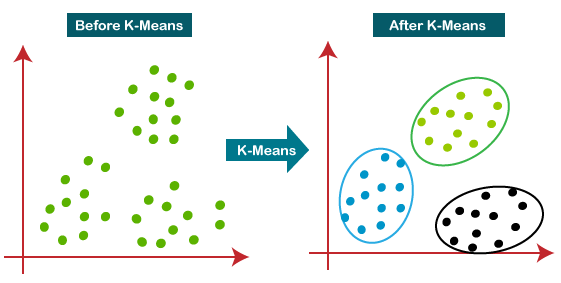
![image.png](attachment:image.png)
(https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

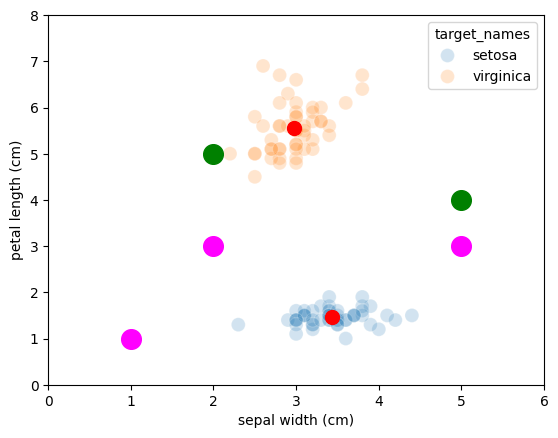

In [ ]:
# KMeans --> unsupervised
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100, alpha=0.2)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

plt.ylim([0, 8])
plt.xlim([0, 6])

# test some points
test_points = [[1, 1], [2, 5], [2, 3], [5, 4], [5, 3]]
preds = kmeans.predict(test_points)

for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

### Adaline
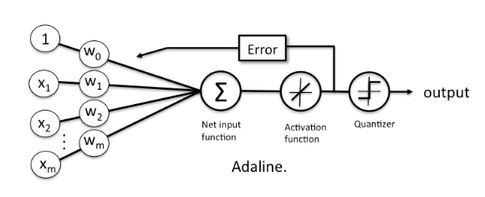
![image.png](attachment:image.png)
(http://rasbt.github.io/mlxtend/user_guide/classifier/Adaline_files/adaline_schematic.png)

#### Gradient Descent
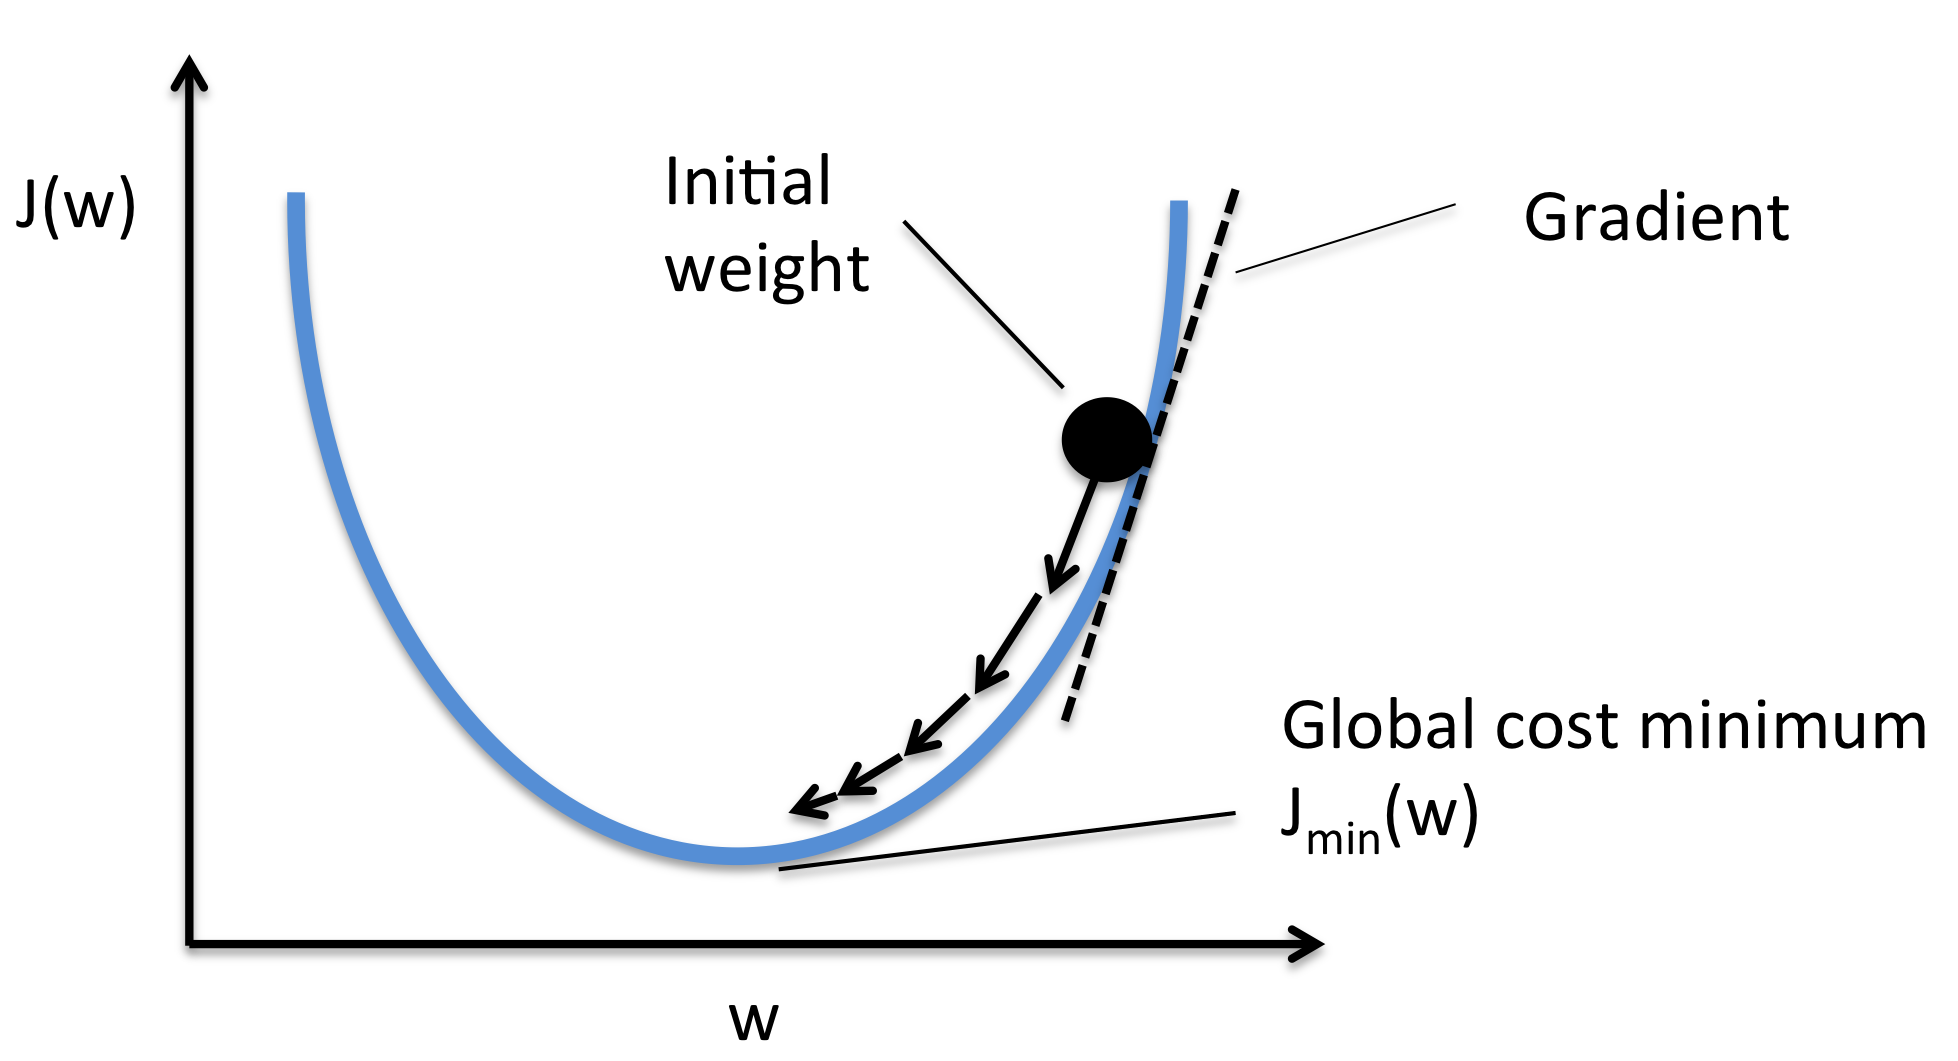
![image.png](attachment:image.png)
(https://sebastianraschka.com/images/faq/gradient-optimization/ball.png)

In [ ]:
# code taken from: https://falksangdata.no/wp-content/uploads/2022/07/python-machine-learning-and-deep-learning-with-python-scikit-learn-and-tensorflow-2.pdf
class AdalineGD(object):
    """ADAptive LInear NEuron classifier."""
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data. """
        rgen = np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
          net_input = self.net_input(X)
          output = self.activation(net_input)
          errors = (y-output)
          self.w_[1:] += self.eta * X.T.dot(errors)
          self.w_[0] += self.eta *errors.sum()
          cost = (errors**2 ).sum()/2.0
          self.cost_.append(cost)
          if i%10==0:
            self.plot_decision_boundary
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:]+self.w_[0])
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)

    def plot_decision_boundary(self):
        c = -self.w[0]/self.w_[2]
        m = -self.w[1]/self.w_[2]
        _x = np.arrange(0,10)
        _y = linearFunction(_x,m,c)
        plt.plot(_x,_y,"k",ls="--")


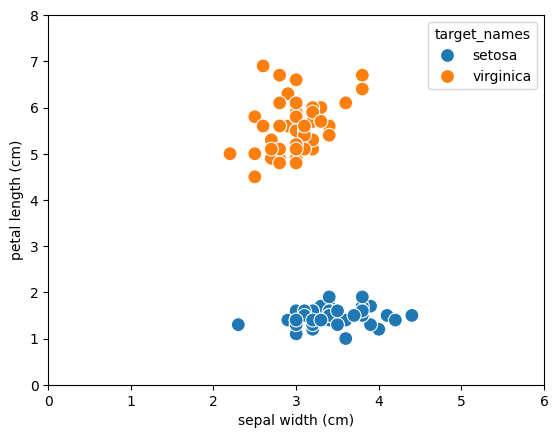

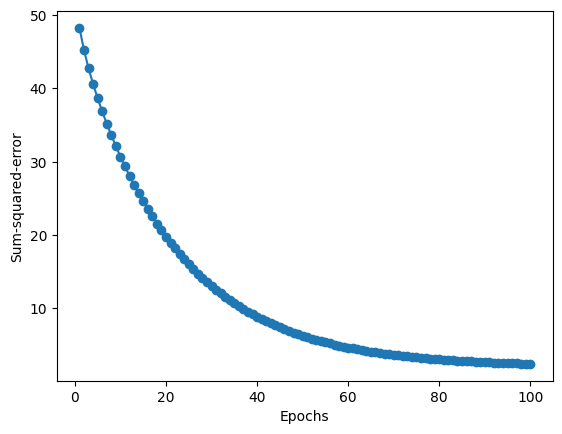

In [ ]:
ada = AdalineGD(n_iter=100,eta=0.0001).fit(X,y)

sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])

# test some points
#test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
#preds = ada.predict(test_points)
#
#for test_p, pred in zip(test_points, preds):
#    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

plt.show()

plt.plot(np.arange(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.show()

### Logistic Regression
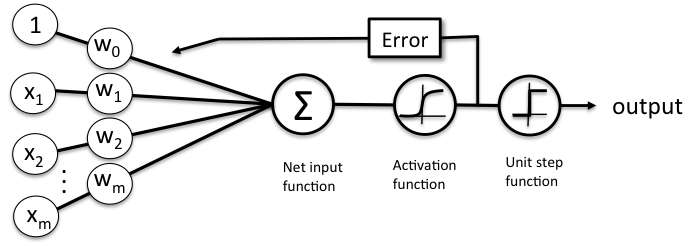
![image.png](attachment:image.png)
(https://sebastianraschka.com/images/faq/logistic_regression_linear/2.png)

![image-2.png](attachment:image-2.png)
(https://sebastianraschka.com/images/faq/logistic_regression_linear/1.png)
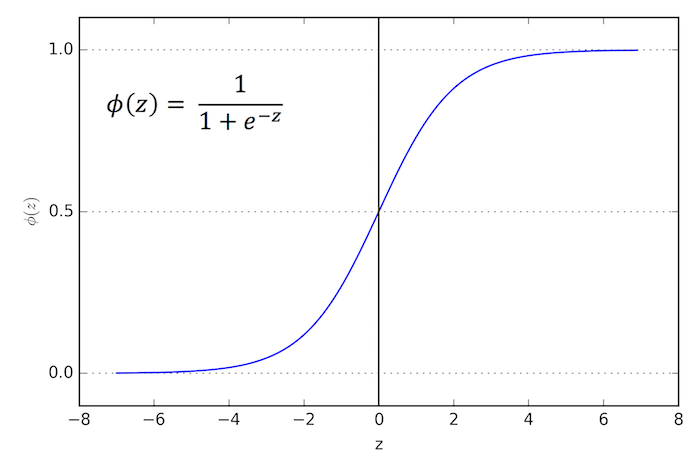

In [ ]:
from sklearn.linear_model import LogisticRegression

# perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [ ]:
log_reg.coef_.T

array([[-0.34637051],
       [ 2.24565951]])

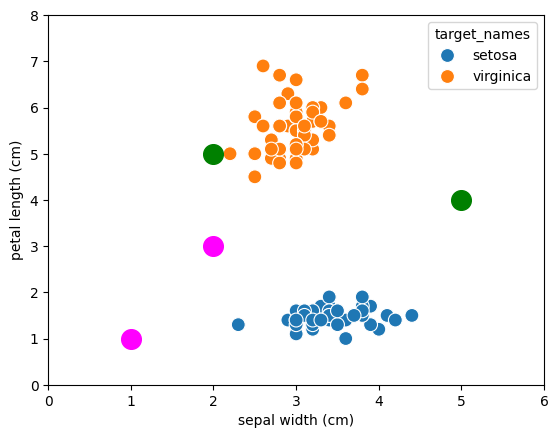

In [ ]:
sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])

# plot line

# Retrieve the model parameters.
b = log_reg.intercept_[0]
w1, w2 = log_reg.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m= -w1/w2

x = np.arange(-1, 8.0, 0.1)
line = linearFunction(x, m, b)
plt.plot(x, line, '--', color='black', linewidth=3)

# test some points
test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
preds = log_reg.predict(test_points)

for test_p, pred in zip(test_points, preds):
    plt.scatter(*test_p, color='green' if pred == 1 else 'magenta', s=200)

plt.show()

In [ ]:
test_points = [[1, 1], [2, 5], [2, 3], [5, 4]]
preds = log_reg.predict(test_points)

In [ ]:
preds

array([-1,  1, -1,  1])

## Use the targets irginica and versicolor now

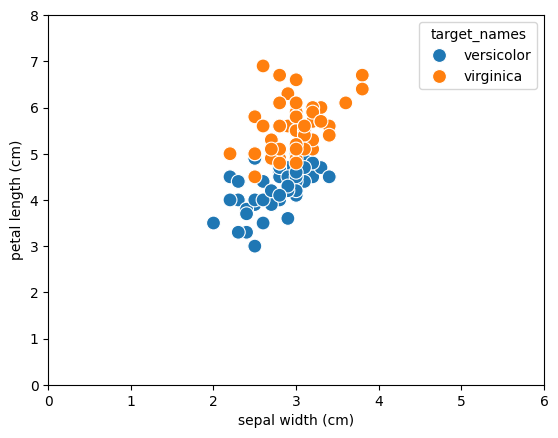

In [ ]:
# create new dataframe with irginica and versicolor classes only
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df['target_names'] = iris_df['target'].map(lambda x: target_names[x])
iris_df = iris_df[iris_df['target_names'].isin(['virginica', 'versicolor'])]
iris_df['target'] = iris_df['target'].map(lambda x: 1 if x == 2 else -1)

sns.scatterplot(data=iris_df, x='sepal width (cm)', y='petal length (cm)', hue='target_names', s=100)
plt.ylim([0, 8])
plt.xlim([0, 6])
plt.show()

In [ ]:
X, y = np.c_[iris_df['sepal width (cm)'], iris_df['petal length (cm)']], iris_df.target

<Axes: >

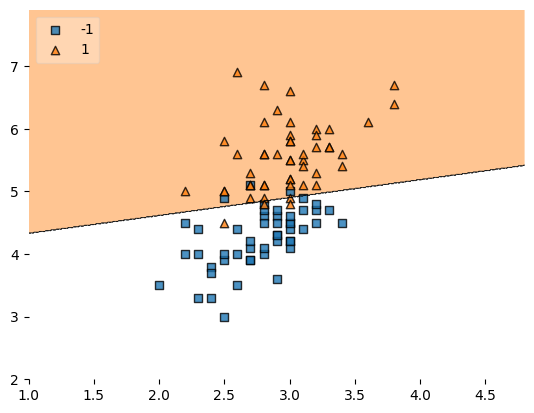

In [ ]:
# perform SVM
svm = SVC(kernel="linear")
svm.fit(X,y)

# plot svm results
plot_decision_regions(X, np.asarray(y), clf=svm, legend=2)